# INTELIGENCIA ARTIFICIAL

## Proyecto 1: Clasificación y Regresión Lineal

Hecho por: Juan Sebastián Clavijo Martínez<br />
TEMA: Usar el dataset sobre dígitos manuscritos (MNIST) para implementar clasificacion lineal y datos artificiales suministrados por el profesor para modelar la relación entre variables mediante regresión lineal<br />
Fecha: 10-09-2024<br />
Notas: Nada por ahora<br />
**Pontificia Universidad Javeriana**


In [62]:
# Importado de bibliotecas pertinentes

import pandas as pd  # tratamiento de datos en un dataframe
import numpy as np  # numerical python
import seaborn as sns  # biblioteca versatil para estadistica y visualizacion
import matplotlib.pyplot as plt  # biblioteca para vizualizacion de datos
from sklearn.datasets import load_digits # repo donde estan las imagenes pertinentes para la primera parte del proyecto
# imports necesarios para el punto 1.2.1
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
# imports necesarios para el punto 1.3.1
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# imports necesarios para el punto 1.4.1
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# imports necesarios para el punto 2.3.1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## PROBLEMA 1: CLASIFICACIÓN  LINEAL

### Parte 1.1 Procesamiento de datos

In [63]:
# Parte 1.1.1: carga de datos
# se trae el dataset
digits = load_digits() #se cargan los datos con la funcion load_digits
print(digits.data.shape)
# Se imprime la forma de los datos para verificar el número de instancias y atributos.
# Según la documentación de scikit-learn (https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset),
# este dataset contiene 1797 instancias, cada una con 64 atributos, que corresponden a una imagen de 8x8 píxeles.
# según la documentacion, este dataset no tiene datos NaN o NULL, por eso no se realiza el paso 1.1.2 limpieza y preparacion de los datos

(1797, 64)


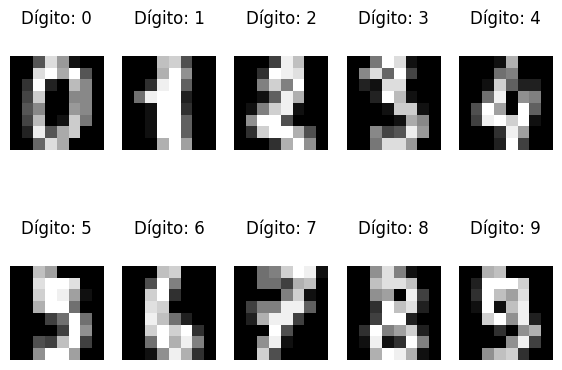

In [64]:
# Parte 1.1.2 visualización de todos los dígitos organizados
# Configurar la cuadrícula 2x5
fig, axes = plt.subplots(2, 5, figsize=(7, 5))
plt.gray()

# Mostrar cada dígito en la cuadrícula
for i, ax in enumerate(axes.flat):
    ax.matshow(digits.images[i])
    ax.set_title(f"Dígito: {digits.target[i]}")
    ax.axis("off")  #se ocultan los ejes para una visualización más limpia

plt.show()

### Análisis descriptivo de las imagenes

- Estas imagenes de los números son fáciles de entender para nosotros los humanos, pero para un computador serían un reto
- A continuación, unas notas sobre las características de algunos dígito:
  - Dígito 0: Se observa como un círculo casi cerrado con una densidad de píxeles más oscura en el centro y un contorno definido, que lo distingue claramente como un "0".
  - Dígito 4: Debido a la manera de presentación, podría ser confundido con un 0 mal escrito
  - Dígito 5: Se puede distinguir un 5, pero la primera parte del trazo, que se parece a una *C*, debería empezar mucho mas cerca a la esquina superior derecha, es poco claro.
  - Dígito 6: Se puede distinguir un 6, pero el centro debería estar más oscuro y debería empezar más cerca a la esquina superior derecha, ya que podría ser confundido con un 1 mal escrito
- Cada dígito en el conjunto de datos MNIST está representado por una imagen pequeña y de baja resolución, lo que permite identificar patrones distintivos que los clasificadores pueden utilizar para diferenciarlos. La variación en la intensidad de los píxeles dentro de cada dígito proporciona información clave sobre la forma y el trazo del número, lo que es esencial para las tareas de clasificación.


### Parte 1.2 Implementación de clasificación con KNN

Resultados para k=1:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       0.98      0.98      0.98        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.93      0.97        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Resultados para k=3:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00 

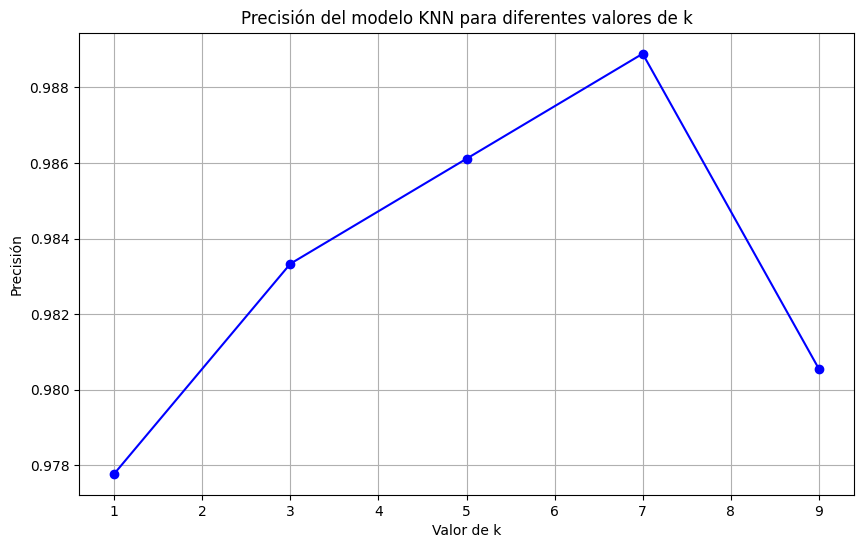

In [65]:
# Parte 1.2.1: implementacion del código

# División de los datos en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=42
)

# Definimos los valores de k que queremos probar
k_values = [1, 3, 5, 7, 9]
accuracies = []

# Implementación y evaluación del modelo KNN para diferentes valores de k
for k in k_values:
    # Crear el clasificador KNN
    knn = KNeighborsClassifier(n_neighbors=k)

    # Entrenar el clasificador
    knn.fit(X_train, y_train)

    # Predecir los valores en el conjunto de prueba
    y_pred = knn.predict(X_test)

    # Evaluar el rendimiento del modelo usando precisión
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Imprimir el reporte de clasificación
    print(f"Resultados para k={k}:\n")
    print(classification_report(y_test, y_pred))
    print("=" * 60)

# Gráfico de la precisión para diferentes valores de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker="o", linestyle="-", color="b")
plt.title("Precisión del modelo KNN para diferentes valores de k")
plt.xlabel("Valor de k")
plt.ylabel("Precisión")
plt.grid(True)
plt.show()

### Parte 1.3 Implementación de clasificación con regresión logistica

In [66]:
# Parte 1.3.1  Clasificadores Binarios para cada dígito


#Dejar la particion igual a como la hice con KNN

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=42
)

# Crear un diccionario para almacenar los modelos
models = {}

# Entrenar un clasificador binario para cada dígito (0 a 9)
for digit in range(10):
    # Crear una etiqueta binaria para el dígito actual
    y_train_binary = (y_train == digit).astype(int)
    y_test_binary = (y_test == digit).astype(int)

    # Crear y entrenar el modelo de regresión logística
    model = LogisticRegression(max_iter=1000, solver="lbfgs")
    model.fit(X_train, y_train_binary)

    # Guardar el modelo entrenado
    models[digit] = model

    # Evaluar el modelo en el conjunto de prueba
    y_pred_binary = model.predict(X_test)
    print(f"Clasificador para el dígito {digit}:")
    print(classification_report(y_test_binary, y_pred_binary))
    print("=" * 60)

Clasificador para el dígito 0:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      0.97      0.98        33

    accuracy                           1.00       360
   macro avg       1.00      0.98      0.99       360
weighted avg       1.00      1.00      1.00       360

Clasificador para el dígito 1:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       332
           1       0.85      1.00      0.92        28

    accuracy                           0.99       360
   macro avg       0.92      0.99      0.96       360
weighted avg       0.99      0.99      0.99       360

Clasificador para el dígito 2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       0.97      1.00      0.99        33

    accuracy                           1.00       360
   macro avg       0.99      1.00  

In [67]:
# Parte 1.3.2 Evaluación de cada clasificador binario para una nueva muestra y selección de la clase con la mayor probabilidad.

# Predicción sobre el conjunto de prueba usando la función de decisión
def predict_digit(models, X):
    # Obtener las probabilidades para cada clase
    probabilities = np.array(
        [model.predict_proba(X)[:, 1] for model in models.values()]
    )

    # Elegir la clase con la probabilidad más alta
    predictions = np.argmax(probabilities, axis=0)
    return predictions


# Predecir los dígitos para el conjunto de prueba
y_pred = predict_digit(models, X_test)

# Evaluar el rendimiento general
print("Evaluación general del modelo multinomial basado en clasificadores binarios:")
print(classification_report(y_test, y_pred))

Evaluación general del modelo multinomial basado en clasificadores binarios:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.90      1.00      0.95        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      0.96      0.98        46
           5       0.94      0.94      0.94        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.90      0.90      0.90        30
           9       0.95      0.93      0.94        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



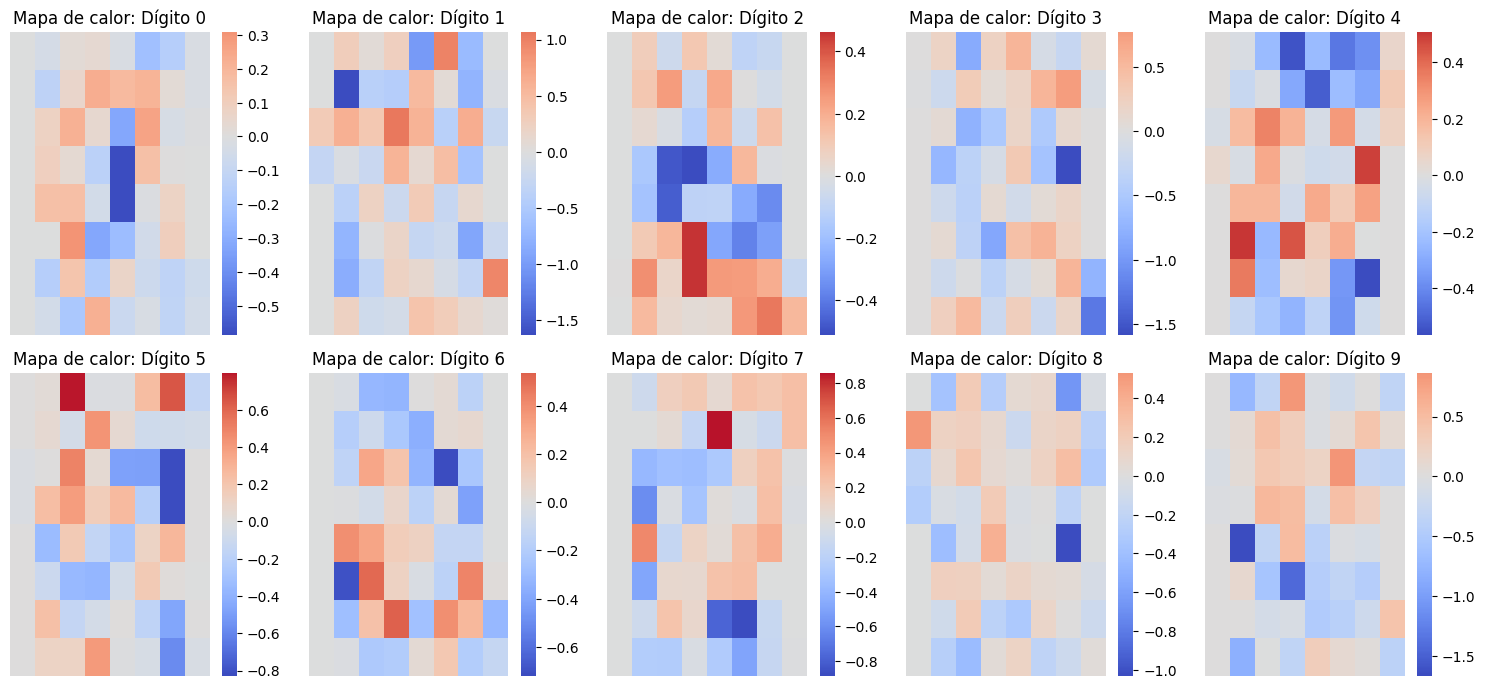

In [68]:
# Parte 1.3.3: Visualizar los pesos (θ) como un mapa de calor en una cuadrícula 2x5

# Configurar la cuadrícula 2x5
fig, axes = plt.subplots(2, 5, figsize=(15, 7))

# Iterar sobre cada modelo y su dígito correspondiente
for i, (digit, model) in enumerate(models.items()):
    # Reshape de los pesos en una matriz de 8x8
    weights = model.coef_.reshape(8, 8)

    # Seleccionar la posición de la cuadrícula
    ax = axes.flat[i]

    # Crear el mapa de calor en la posición correspondiente
    sns.heatmap(weights, annot=False, cmap="coolwarm", center=0, ax=ax)
    ax.set_title(f"Mapa de calor: Dígito {digit}")
    ax.axis("off")  # Ocultar los ejes para una visualización más limpia

# Ajustar el espaciado entre los subplots para mejor visualización
plt.tight_layout()
plt.show()

Evaluación del modelo multinomial:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



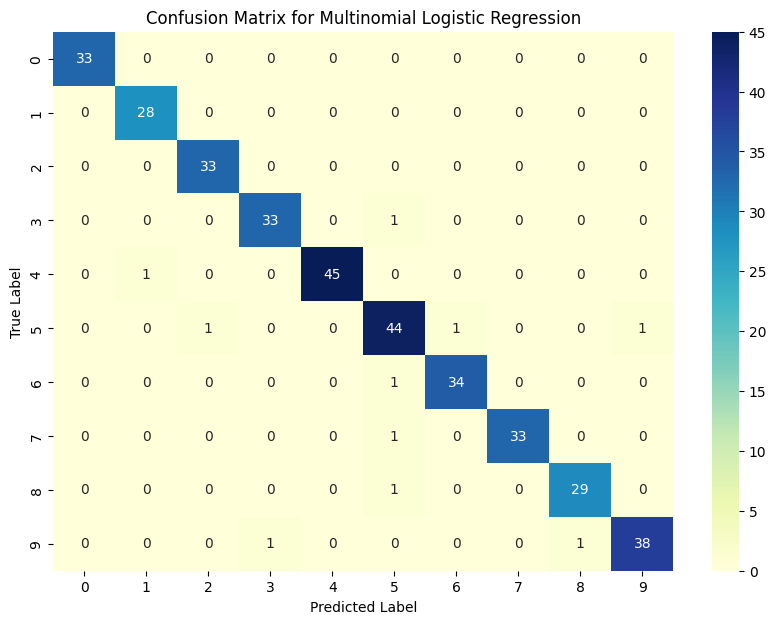

In [69]:
# Parte 1.4 Impementacion de clasificador multinomial

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=42
)

# Crear y entrenar el modelo de regresión logística con opción multinomial
model_multinomial = LogisticRegression(
    max_iter=10000, solver="lbfgs", multi_class="multinomial"
)
model_multinomial.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_multinomial = model_multinomial.predict(X_test)

# Evaluar el rendimiento del clasificador multinomial
print("Evaluación del modelo multinomial:")
print(classification_report(y_test, y_pred_multinomial))

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_multinomial)

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    xticklabels=digits.target_names,
    yticklabels=digits.target_names,
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Multinomial Logistic Regression")
plt.show()

//hablar sobre los numeros equivocados, compararlos con los pesos, con otros digitos de la misma clase

### Preguntas de aprendizaje

1. ¿Qué influencia tiene el uso de diferentes valores de K en el clasificador KNN?<br />
R = 
2. ¿Qué diferencias hay entre el clasificador utilizando KNN y regresión logística? ¿Funciona uno mejor que otro?, ¿Porqué?<br />
R = 
3. ¿El clasificador de regresión logistica presenta un buen rendimiento? ¿Cómo evaluan su rendimiento?¿Si el rendimiento no es bueno que cree se debe hacer para mejorarlo?<br />
R = 
4. Al realizar el mapa de calor con los pesos de la regresión logística, para los diferentes clasificadores, ¿Qué puede notar? ¿Hay algun tipo de patrón?, ¿Sí, no, porqué?<br />
R = 
5. ¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los metodos de clasificación y como se aplicó en este proyecto.<br />
R = 

## PROBLEMA 2: Regresión Lineal

### Parte 2.1 procesamiento de datos

In [70]:
# Parte 2.1.1: carga de datos
# se trae el dataset
# Aunque nos proporcionaron el archivo.csv y viene en la carpeta de este proyecto, decidí colgarlo en github para más
# comodidad y por si algo le pasa, que pueda ser facilmente traído a través de internet
url = "https://raw.githubusercontent.com/jclavijomartinez/IA2430/master/Proyecto1/RegressionData.csv" 
# se hace el obj dataframe
df_artif = pd.read_csv(url) # Se llama asi porque la base de datos es artificial
# se presentan los primeros 5 renglones
df_artif.head(5)

,X1,X2,y
0,53.766714,1.347397,0.594013
1,183.388501,-1.338226,0.505659
2,-225.884686,-0.800645,0.253316
3,86.217332,-1.343605,0.453381
4,31.876524,1.151258,1.720519


In [71]:
# Parte 2.1.2: limpieza y preparación de los datos (cuenta de datos null, NaN, etc. y limpieza)
desaparecidos = len(df_artif) - len(df_artif.dropna())
Cantidad = len(df_artif)
print("Cantidad de datos observados con datos NaN", desaparecidos)
print("Cantidad de datos duplicados", df_artif.duplicated().sum())
##se eliminan los datos Null y Duplicados
df_artif.dropna(inplace=True)
df_artif.drop_duplicates(inplace=True)
# Se reinicia el indice por los elementos eliminados
df_artif.reset_index(drop=True, inplace=True)

Cantidad de datos observados con datos NaN 0
Cantidad de datos duplicados 0


### Parte 2.2 Analisis de los datos

A continuación se usan los comandos [df].info() y [df].describe() para presentar informacion clave sobre el dataframe, posteriormente se grafican las distribuciones de las variables y se procede a hacer un analisis descriptivo de los datos

In [72]:
# Parte 2.2.1 presentacion del df_artif

df_artif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
 2   y       1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [73]:
df_artif.describe()

,X1,X2,y
count,1000.000000,1000.000000,1000.000000
mean,-3.263196,0.073797,0.996858
std,99.896532,1.997194,0.791569
min,-323.203780,-6.144331,-0.650879
25%,-71.263595,-1.240731,0.331548
50%,-3.043251,0.099402,0.947372
75%,61.056271,1.347746,1.649241
max,357.839694,7.139736,3.325075


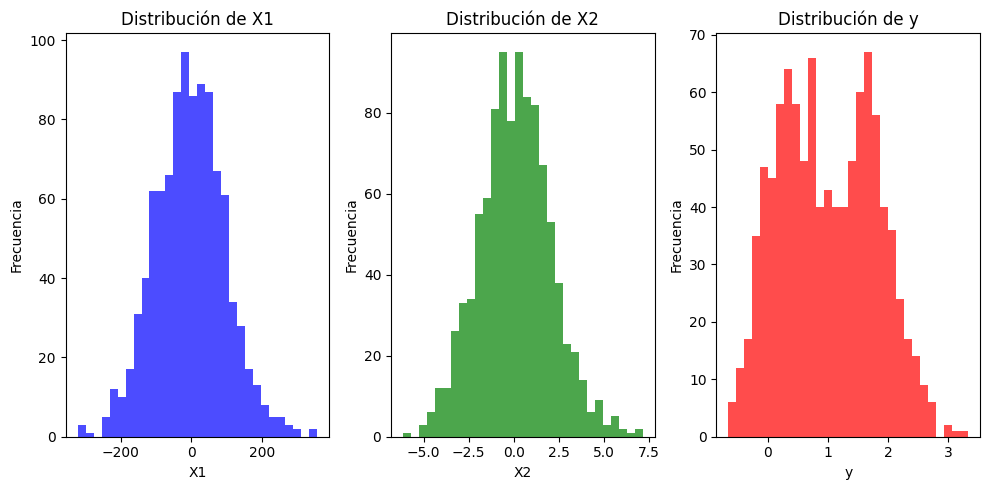

In [74]:
# Se graffican las variables en un histograma para visualizar mejor su distribución

# Crear la figura y los subplots, con 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Histograma para X1
axes[0].hist(df_artif["X1"], bins=30, color="blue", alpha=0.7)
axes[0].set_title("Distribución de X1")
axes[0].set_xlabel("X1")
axes[0].set_ylabel("Frecuencia")

# Histograma para X2
axes[1].hist(df_artif["X2"], bins=30, color="green", alpha=0.7)
axes[1].set_title("Distribución de X2")
axes[1].set_xlabel("X2")
axes[1].set_ylabel("Frecuencia")

# Histograma para y
axes[2].hist(df_artif["y"], bins=30, color="red", alpha=0.7)
axes[2].set_title("Distribución de y")
axes[2].set_xlabel("y")
axes[2].set_ylabel("Frecuencia")

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

### Análisis descriptivo:

Según la información mostrada arriba, se puede hablar más a profundidad sobre los datos, 

### Parte 2.3 implementación de regresión lineal

Mean Squared Error: 0.5037207186449122
R^2 Score: 0.19462693225765915


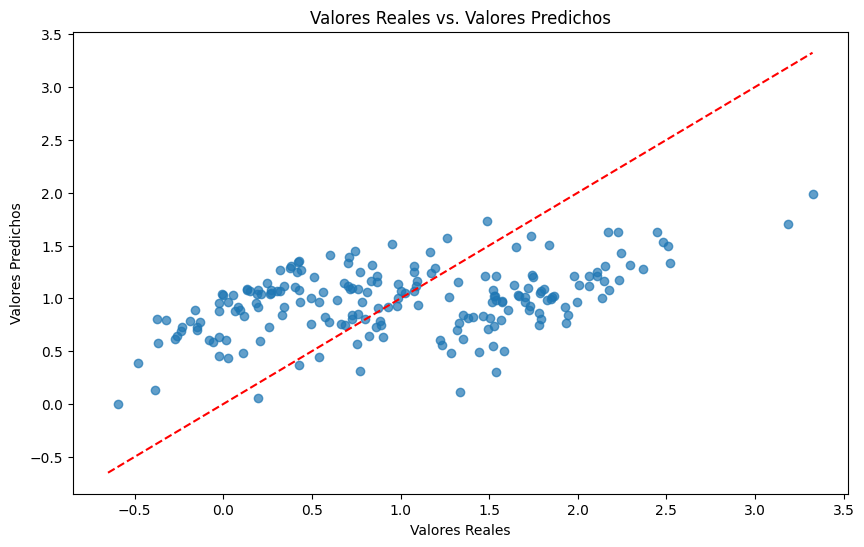

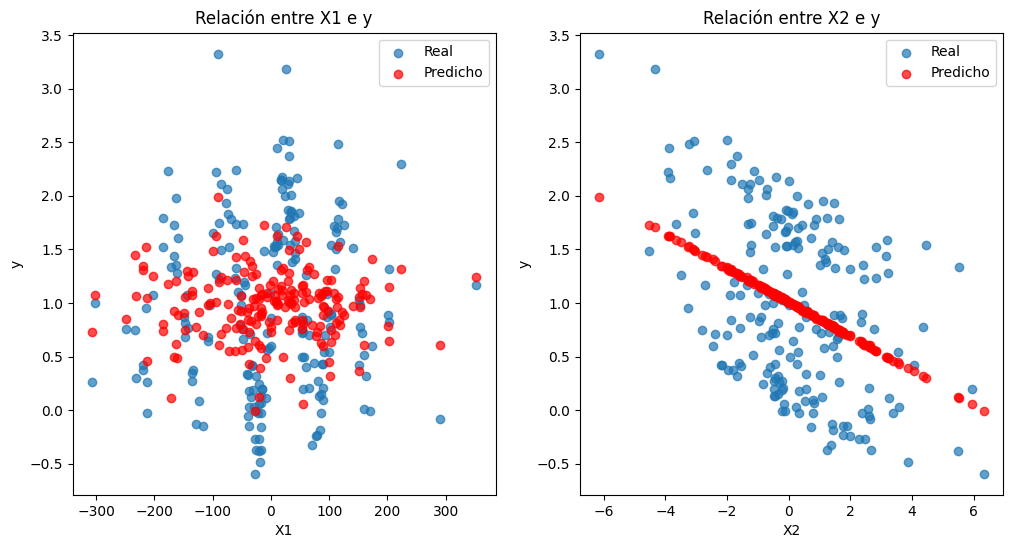

In [75]:
# Parte 2.3.1 Implementacion de regresion lineal

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_artif[["X1", "X2"]]
y = df_artif["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir los valores de y en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Gráficas

# Gráfico de valores reales vs valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--", color="red")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs. Valores Predichos")
plt.show()

# Graficar la relación entre X1, X2 y y
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(X_test["X1"], y_test, label="Real", alpha=0.7)
ax[0].scatter(X_test["X1"], y_pred, label="Predicho", alpha=0.7, color="red")
ax[0].set_xlabel("X1")
ax[0].set_ylabel("y")
ax[0].set_title("Relación entre X1 e y")
ax[0].legend()

ax[1].scatter(X_test["X2"], y_test, label="Real", alpha=0.7)
ax[1].scatter(X_test["X2"], y_pred, label="Predicho", alpha=0.7, color="red")
ax[1].set_xlabel("X2")
ax[1].set_ylabel("y")
ax[1].set_title("Relación entre X2 e y")
ax[1].legend()

plt.show()

In [ ]:
#QUE transformacion hay que hacer? para poder, ambas tienen una transformacion no lineal, despues de transf lineal

## Preguntas de aprendizaje

1. ¿Cómo evaluarón que la regresión fuera adecuada?<br />
R =
2. ¿Realizarón algún tipo de transformación no lineal a los datos de entrada? Si fue así, ¿Qué transformación realizarón y por qué?<br />
R = 
3. ¿Considera que lso resultados obtenidos son adecuados, o se pueden mejorar?<br />
R = 
4. ¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los metodos de regresión lineal y como se aplicó en este proyecto.<br />
R = 